In [1]:
import numpy as np

In [366]:
np.random.seed(1)
print(np.around(np.random.rand(3),decimals=6)) # 生成包含3个元素的数组，并保留6位小数

[4.17022e-01 7.20324e-01 1.14000e-04]


In [368]:
np.random.seed(123)
print(np.around(np.random.rand(3),decimals=6))

[0.696469 0.286139 0.226851]


In [369]:
np.random.seed(123456789)
print(np.around(np.random.rand(3),decimals=6))

[0.532833 0.534137 0.509553]


In [370]:
np.random.seed(1)
print(np.around(np.random.rand(3),decimals=6))

[4.17022e-01 7.20324e-01 1.14000e-04]


In [371]:
np.random.seed(123)
print(np.around(np.random.rand(3),decimals=6))

[0.696469 0.286139 0.226851]


In [372]:
np.random.seed(123456789)
print(np.around(np.random.rand(3),decimals=6))

[0.532833 0.534137 0.509553]


In [397]:
random_state = np.random.RandomState(seed=520)
random_state.randn(5)

array([-1.41094505, -0.28032189, -0.03494765, -0.30044379, -1.30650098])

In [399]:
np.random.seed(520)
np.random.randn(5)

array([-1.41094505, -0.28032189, -0.03494765, -0.30044379, -1.30650098])

In [402]:
random_state = np.random.RandomState()
random_state.randn(5)

array([-0.57261666,  0.1517278 ,  1.05577447, -0.40571997, -1.37569758])

class:0,num:334
class:1,num:333
class:2,num:333


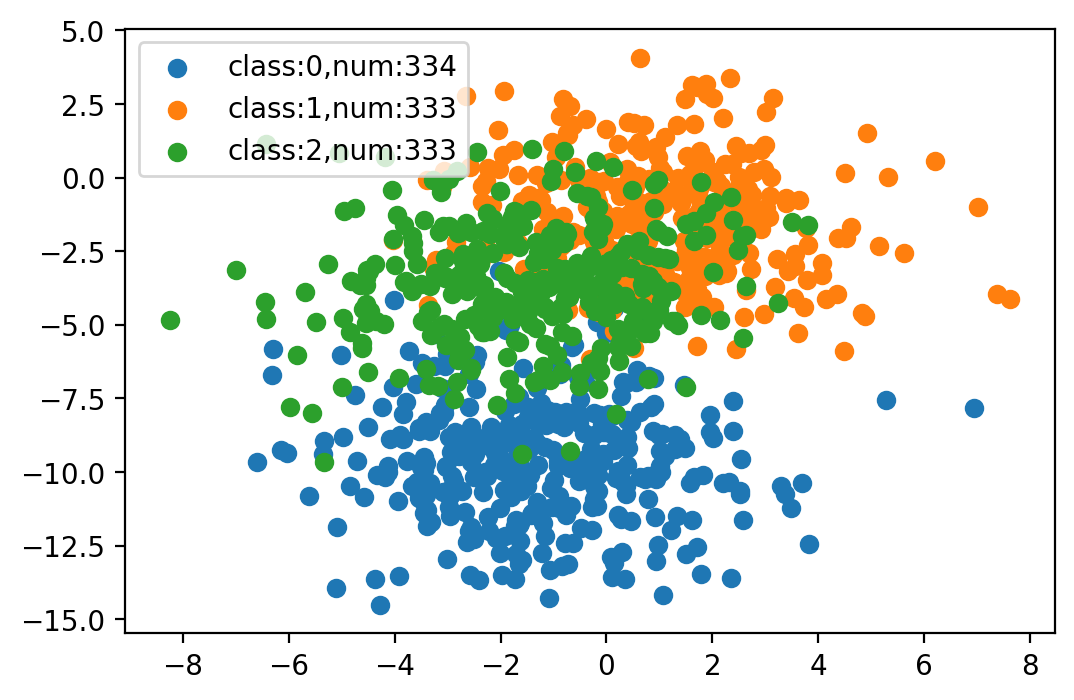

In [440]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import where

# 生成二维平面中的三类样本点；
# 其中X的shape为（1000,2）,“2”代表样本点的横纵轴坐标；y的shape为（1000，）表示样本标签。
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# 设置绘图的像素值为200
plt.figure(dpi=200)

# 统计各类样本的个数
samples_num = {}

# 绘制各类样本的散点图
for class_value in range(3):
    # s通过样本标签找出各类样本对应的索引
    row_ix = where(y == class_value) # 返回元组
    # 统计各类样本数量
    samples_num[class_value] = row_ix[0].shape[0]
    # 使用不同颜色绘制散点图
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'class:{class_value},num:{samples_num[class_value]}')

plt.legend()
plt.show()

In [408]:
X.shape

(1000, 2)

In [410]:
y

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

In [433]:
from tensorflow.keras.utils import to_categorical
def prepare_data():
    # 生成样本
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one-hot编码
    y = to_categorical(y) # tf.keras.utils.to_categorical
    # 训练集、验证集（测试集）划分
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, testX, trainy, testy

In [437]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

def get_base_model(trainX, trainy):
    # 模型定义
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # 模型编译
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # 模型训练
    model.fit(trainX, trainy, epochs=100, verbose=0)
    return model

C:\anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [435]:
def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

In [436]:
def add_layer(model, trainX, trainy):
    # 保留输出层，以便添加新的隐藏层
    output_layer = model.layers[-1]
    model.pop()
    
    # 将之前的层设置为不可训练，以保证权重不更新
    for layer in model.layers:
        layer.trainable = False
        
    # 添加隐藏层，其配置与基本模型的第一层相同
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(output_layer)
    
    # 训练模型
    model.fit(trainX, trainy, epochs=100, verbose=0)

In [ ]:
n_layers = 10

for i in range(n_layers):
    # 添加隐藏层
    add_layer(model, trainX, trainy)
    # 评估模型
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    # 将准确率存储到字典，方便绘图
    scores[len(model.layers)] = (train_acc, test_acc)

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()

> layers=2, train=0.814, test=0.834
> layers=3, train=0.834, test=0.828
> layers=4, train=0.846, test=0.830
> layers=5, train=0.846, test=0.828
> layers=6, train=0.836, test=0.826
> layers=7, train=0.846, test=0.824
> layers=8, train=0.840, test=0.816
> layers=9, train=0.836, test=0.826
> layers=10, train=0.846, test=0.826
> layers=11, train=0.844, test=0.826
> layers=12, train=0.840, test=0.820


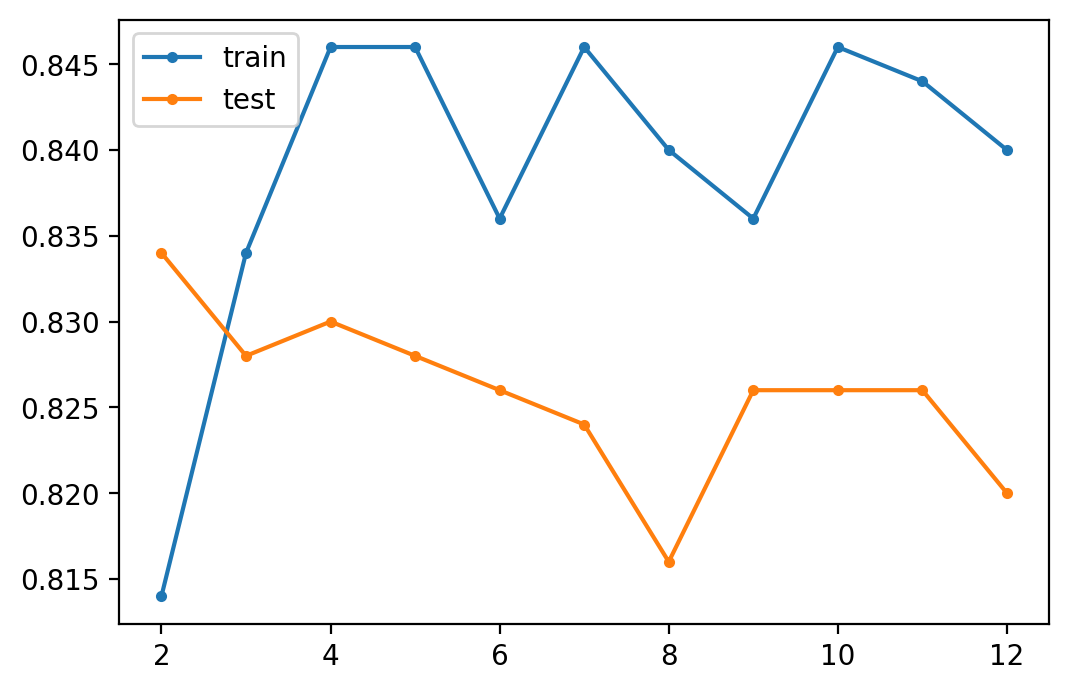

In [438]:
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

# 1.准备数据
def prepare_data():
    # 生成样本
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one-hot编码
    y = to_categorical(y) # tf.keras.utils.to_categorical
    # 训练集、验证集（测试集）划分
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, testX, trainy, testy

# 2.定义模型
def get_base_model(trainX, trainy):
    # 模型定义
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # 模型编译
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # 模型训练
    model.fit(trainX, trainy, epochs=100, verbose=0)
    return model

# 3.评估模型
def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

# 4.贪婪逐层预训练配置
def add_layer(model, trainX, trainy):
    # 保留输出层，以便添加新的隐藏层
    output_layer = model.layers[-1]
    model.pop()
    
    # 将之前的层设置为不可训练，以保证权重不更新
    for layer in model.layers:
        layer.trainable = False
        
    # 添加隐藏层，其配置与基本模型的第一层相同
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(output_layer)
    
    # 训练模型
    model.fit(trainX, trainy, epochs=100, verbose=0)
    
# 准备数据
trainX, testX, trainy, testy = prepare_data()
# 基本模型
model = get_base_model(trainX, trainy)
# 创建字典，用于保存不同隐藏层模型的准确率
scores = {}
# 训练与评估
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
# 打印准确率
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
# 保存准确率
scores[len(model.layers)] = (train_acc, test_acc)

n_layers = 10

for i in range(n_layers):
    # 添加隐藏层
    add_layer(model, trainX, trainy)
    # 评估模型
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    # 将准确率存储到字典，方便绘图
    scores[len(model.layers)] = (train_acc, test_acc)

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()

In [ ]:
def base_autoencoder(trainX, testX):
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9))
    model.fit(trainX, trainX, epochs=100, verbose=0)
    # evaluate reconstruction loss
    train_mse = model.evaluate(trainX, trainX, verbose=0)
    test_mse = model.evaluate(testX, testX, verbose=0)
    print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))
    return model